## MIAD - Deep Learning - Miniproyecto - Grupo 09

### Librerías

In [1]:
# Librerías generales para el análisis de datos 
import os                             # Manejo de archivos y directorios
import pandas as pd                   # Manipulación de datos
import numpy as np                    # Cálculos numéricos
import matplotlib.pyplot as plt       # Visualización de datos
import seaborn as sns                 # Visualización de datos

In [2]:
# Librerías para el preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

In [3]:
# Librerías para el modelado con TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# Librerías para modelos clásicos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Carga de datos

In [6]:
# Lectura del archivo de entrenamiento (train)
df = pd.read_csv('spam_train.csv')
print ("El tamaño del dataset es: ", df.shape)
df.info()

El tamaño del dataset es:  (3001, 59)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 59 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3001 non-null   int64  
 1   V1      3001 non-null   float64
 2   V2      3001 non-null   float64
 3   V3      3001 non-null   float64
 4   V4      3001 non-null   float64
 5   V5      3001 non-null   float64
 6   V6      3001 non-null   float64
 7   V7      3001 non-null   float64
 8   V8      3001 non-null   float64
 9   V9      3001 non-null   float64
 10  V10     3001 non-null   float64
 11  V11     3001 non-null   float64
 12  V12     3001 non-null   float64
 13  V13     3001 non-null   float64
 14  V14     3001 non-null   float64
 15  V15     3001 non-null   float64
 16  V16     3001 non-null   float64
 17  V17     3001 non-null   float64
 18  V18     3001 non-null   float64
 19  V19     3001 non-null   float64
 20  V20     3001 non-null   float64
 21 

### Entendimiento de los datos

In [7]:
print("La variable objetivo cuenta con:" + str(df["V58"].unique()) + "valores únicos.")

# Aislamiento de variables predictoras y objetivo
X = df.drop(columns=["ID", "V58"])
y = df["V58"]

La variable objetivo cuenta con:[1 0]valores únicos.


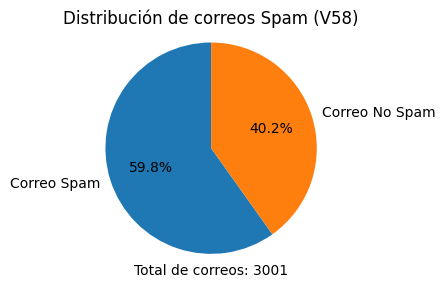

In [8]:
#  Distribución de la variable objetivo
counts = df['V58'].value_counts(dropna=False)
total = counts.sum()

# Gráfica circular
labels = ["Correo Spam", "Correo No Spam"]
plt.figure(figsize=(3, 3))
plt.pie(
    counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)

# Diseño gráfico
plt.title("Distribución de correos Spam (V58)")
plt.text(0, -1.2,f"Total de correos: {total}",ha="center",fontsize=10)
plt.axis("equal")
plt.show()

In [9]:
# Estadística descriptiva de las variables numéricas
X.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,3001.0,0.098570,0.339230,0.000,0.000,0.000,0.000,6.060
V2,3001.0,0.216348,1.300497,0.000,0.000,0.000,0.000,14.280
V3,3001.0,0.280920,0.497393,0.000,0.000,0.000,0.430,5.100
V4,3001.0,0.088704,1.700779,0.000,0.000,0.000,0.000,42.810
V5,3001.0,0.322706,0.706823,0.000,0.000,0.000,0.400,10.000
V6,3001.0,0.150202,0.272827,0.000,0.000,0.054,0.192,3.609
V7,3001.0,0.112929,0.377867,0.000,0.000,0.000,0.000,7.270
V8,3001.0,0.111876,0.323354,0.000,0.000,0.000,0.000,4.340
V9,3001.0,0.161871,0.556893,0.036,0.036,0.036,0.036,9.126
V10,3001.0,0.251036,0.698606,0.000,0.000,0.000,0.170,18.180


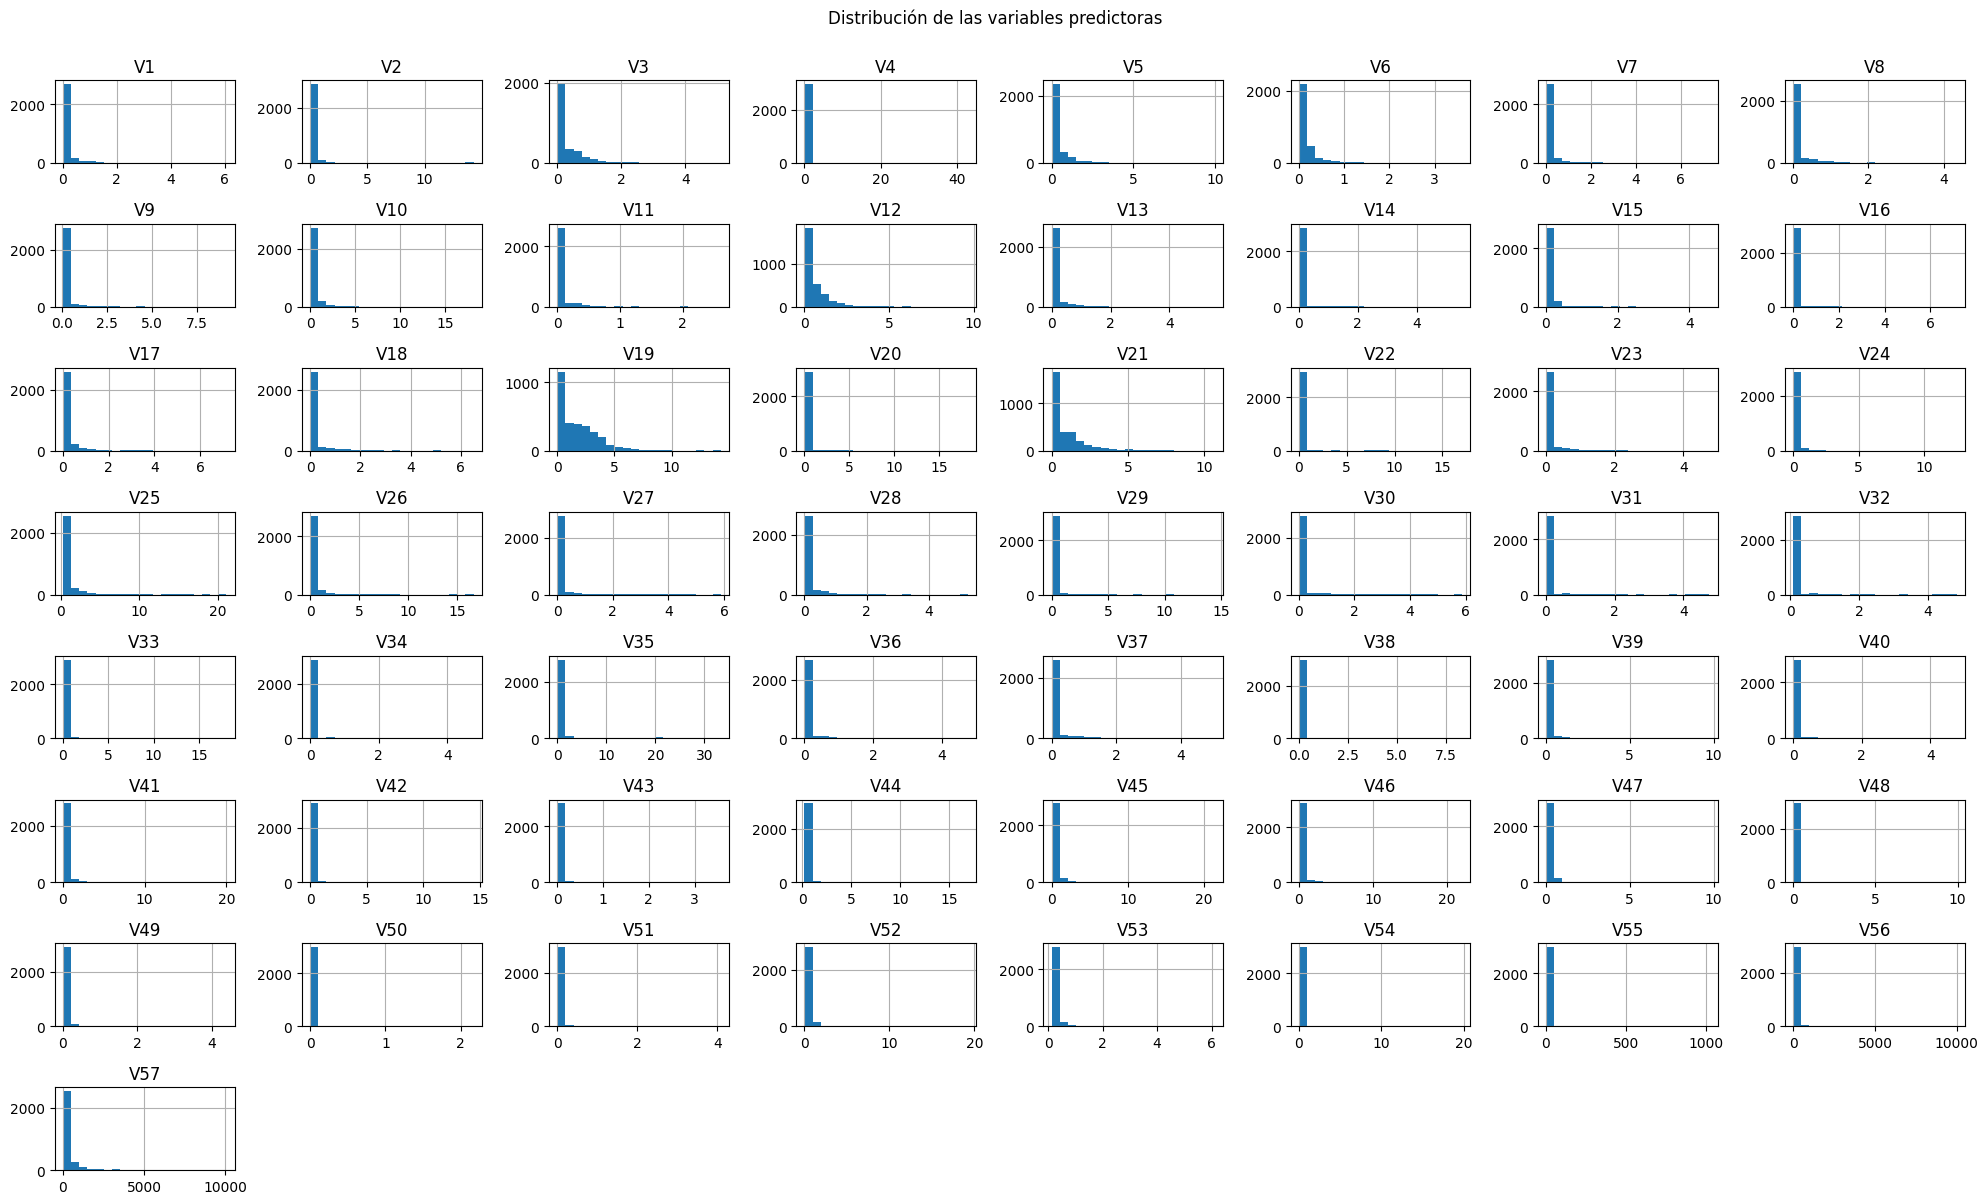

In [10]:
# Análisis de la distribución de las variables predictoras
X.hist(figsize=(20,12), bins=20)
plt.suptitle("Distribución de las variables predictoras", y=1.0)
plt.tight_layout()
plt.show()

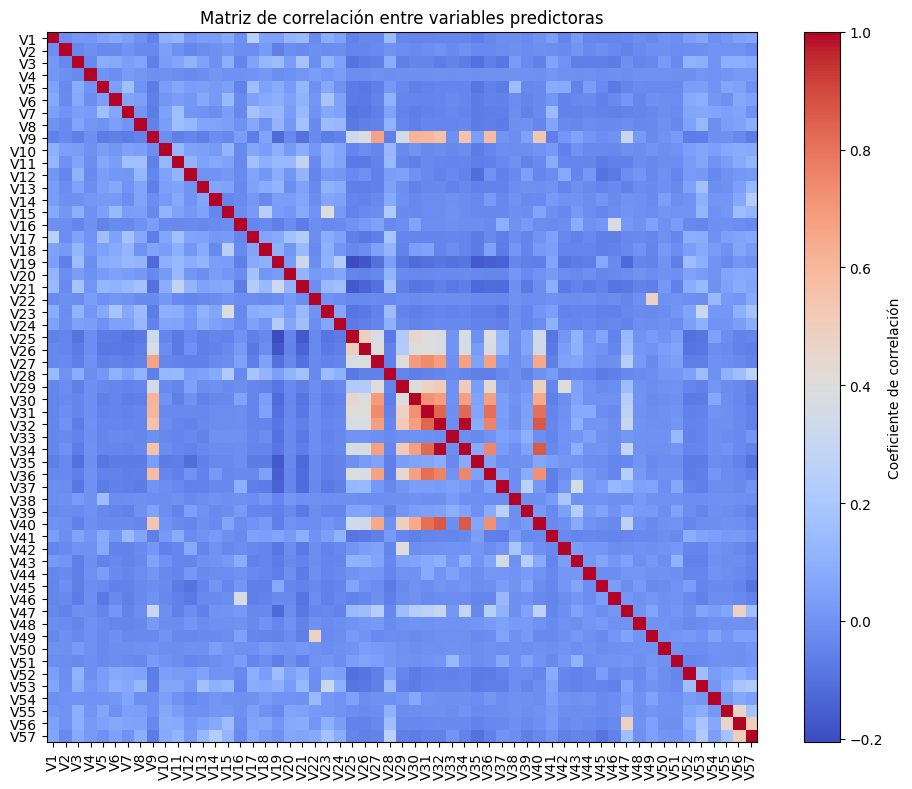

In [11]:
# Matirz de correlación variables predictoras
corr = X.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Coeficiente de correlación")

# Etiquetas
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Título
plt.title("Matriz de correlación entre variables predictoras")
plt.tight_layout()
plt.show()

#### Resultados del entendimiento de datos

* Calidad y estructura de los datos:
    No se identificaron valores faltantes, lo que indica una base limpia y lista para modelado sin necesidad de imputación. Las variables predictoras (V1–V57) son numéricas, lo cual facilita su uso directo en modelos de aprendizaje automático, particularmente en:

    - Modelos lineales (Logistic Regression)
    - Modelos basados en árboles (Random Forest, Gradient Boosting)
    - Máquinas de soporte vectorial (SVM)
    - Redes neuronales (MLP)

    No obstante, aunque las variables son numéricas, requieren escalado previo, especialmente para modelos sensibles a magnitudes como redes neuronales y SVM. El tamaño de la base de entrenamiento es mediano, esto implica que es suficientemente grande para modelos clásicos robustos y adecuado para redes neuronales pequeñas.

* Variable objetivo y balance de clases:
    La variable objetivo (V58) corresponde a la clasificación de correos electrónicos en:

    - 1.796 correos legítimos (59,85%)
    - 1.205 correos spam (40,15%)

    Se trata de un problema de clasificación binaria con desbalance moderado, no extremo. Este nivel de desbalance:

    - No invalida el uso de accuracy como métrica inicial,
    - Pero requiere complementar la evaluación con: Precision, Recall, F1-score, ROC-AUC.

    En problemas de spam, el costo de error no es simétrico: clasificar spam como legítimo puede ser más crítico dependiendo del contexto operativo.

* Distribución de predictores:
    El análisis univariado revela un patrón típico de variables basadas en frecuencias:

    - Alta asimetría positiva (sesgo a la derecha)
    - Mediana igual a cero en múltiples variables
    - Concentración de masa en valores bajos
    - Presencia de colas largas
    - Valores extremos en variables como V55, V56 y V57

    La mayoría de los correos no contienen ciertos términos o caracteres específicos (frecuencia cero), pero cuando estos aparecen, pueden hacerlo con intensidades significativamente variables. Este comportamiento es característico de representaciones basadas en frecuencia de términos. Teniendo en cuenta estos resultados, se podria utilizar un transformacion logaritmica para reducir asimetria. 

    La matriz de correlación muestra que existen predictores que se mueven casi en bloque, con correlaciones muy altas entre algunas variables (V25 a V37). Esto sugiere redundancia y colinealidad en ciertos grupos de términos. En conjunto, la exploración confirma que el dataset contiene patrones claros asociados a spam, pero también presenta asimetrías marcadas y variables parcialmente redundantes, lo que respalda el uso de modelos con capacidad de capturar relaciones no lineales y de manejar interacciones entre predictores.

### Modelamiento de los datos

##### Division de los datos y escalado

In [12]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y # Estratificación para mantener la proporción de clases en ambos conjuntos
)

X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

# Escalamiento
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Modelo 01 - Logistic regression

In [13]:
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       539
           1       0.93      0.91      0.92       362

    accuracy                           0.94       901
   macro avg       0.94      0.93      0.94       901
weighted avg       0.94      0.94      0.94       901

ROC-AUC: 0.9786488176385572


##### Modelo 02 - Random Forest

In [14]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       539
           1       0.96      0.91      0.93       362

    accuracy                           0.95       901
   macro avg       0.95      0.94      0.94       901
weighted avg       0.95      0.95      0.95       901

ROC-AUC: 0.9814061234740002


In [16]:
# Datos de test
test_df = pd.read_csv("spam_test.csv")
sample_sub = pd.read_csv("sample_submission.csv")  # (opcional, para validar estructura)

X_kaggle = test_df.drop(columns=["ID"])
X_kaggle = X_kaggle.reindex(columns=X.columns)
X_kaggle = X_kaggle.fillna(0)

X_kaggle = np.log1p(X_kaggle)
X_kaggle_scaled = scaler.transform(X_kaggle)

# Predicciones
proba = rf_model.predict(X_kaggle_scaled).ravel()
pred_label = (proba >= 0.5).astype(int)

# Crear sarchivo de salida
submission = pd.DataFrame({
    "ID": test_df["ID"].values,
    "Label": pred_label
})

# Guardar archivo final
submission.to_csv("submission.csv", index=False)
submission.head()

,ID,Label
0,1147,0
1,2299,0
2,2839,1
3,52,1
4,4507,0


##### Modelo 03 - Red nueronal

In [17]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

y_prob_nn = model.predict(X_test).ravel()
y_pred_nn = (y_prob_nn >= 0.5).astype(int)

print("=== Neural Network ===")
print(classification_report(y_test, y_pred_nn))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_nn))

Epoch 1/100


c:\Users\CYBER\Documents\Maestria MIAD\Maestria-MIAD\Machine Learning MIAD\Deep Learning\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6970 - loss: 0.6534 - val_accuracy: 0.7405 - val_loss: 0.6302
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7911 - loss: 0.5486 - val_accuracy: 0.8476 - val_loss: 0.4698
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8661 - loss: 0.3931 - val_accuracy: 0.8810 - val_loss: 0.3328
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8851 - loss: 0.3062 - val_accuracy: 0.8976 - val_loss: 0.2817
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9018 - loss: 0.2638 - val_accuracy: 0.9024 - val_loss: 0.2632
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9036 - loss: 0.2437 - val_accuracy: 0.9167 - val_loss: 0.2505
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9065 - loss: 0.2325 - val_accuracy: 0.9190 - val_loss: 0.2403
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9167 - loss: 0.2273 - val_accuracy: 0.9214 - val_loss: 0.2

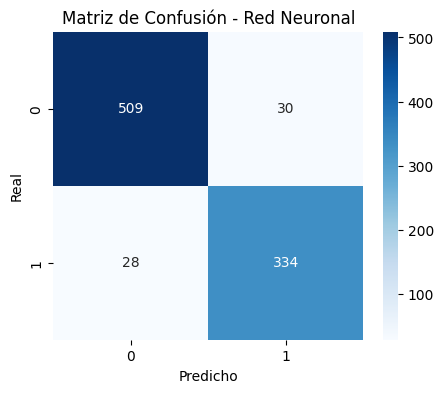

In [18]:
cm = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Red Neuronal")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()

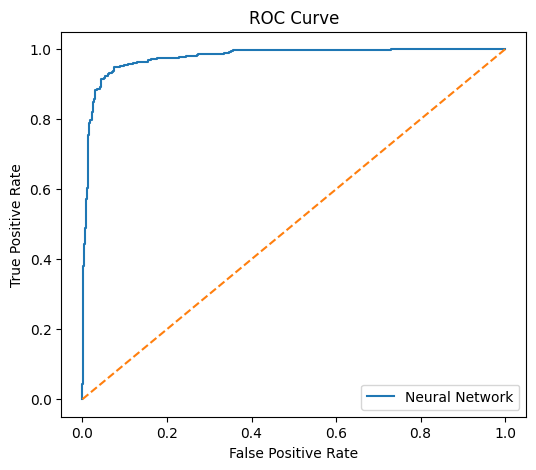

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nn)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Neural Network")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [20]:
# Datos de test
test_df = pd.read_csv("spam_test.csv")
sample_sub = pd.read_csv("sample_submission.csv")  # (opcional, para validar estructura)

X_kaggle = test_df.drop(columns=["ID"])
X_kaggle = X_kaggle.reindex(columns=X.columns)
X_kaggle = X_kaggle.fillna(0)

X_kaggle = np.log1p(X_kaggle)
X_kaggle_scaled = scaler.transform(X_kaggle)

# Predicciones
proba = model.predict(X_kaggle_scaled, verbose=0).ravel()
pred_label = (proba >= 0.5).astype(int)

# Crear sarchivo de salida
submission = pd.DataFrame({
    "ID": test_df["ID"].values,
    "Label": pred_label
})

# Guardar archivo final
submission.to_csv("submission.csv", index=False)
submission.head()

,ID,Label
0,1147,1
1,2299,0
2,2839,1
3,52,1
4,4507,0


##### Daya

In [ ]:
def build_model(activation="relu", n_hidden=1, n_neurons=32):
    
    model = keras.Sequential()
    
    model.add(layers.Input(shape=(X_train.shape[1],)))
    
    for _ in range(n_hidden):
        model.add(layers.Dense(n_neurons, activation=activation))
    
    model.add(layers.Dense(1, activation="sigmoid"))
    
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

In [ ]:
activations = ["relu", "tanh", "sigmoid"]
hidden_layers = [1, 2]
neurons = [32, 64]

In [ ]:
results = []

for act in activations:
    for hl in hidden_layers:
        for neu in neurons:
            
            model = build_model(
                activation=act,
                n_hidden=hl,
                n_neurons=neu
            )
            
            history = model.fit(
                X_train, y_train,
                epochs=30,
                batch_size=32,
                verbose=0,
                validation_split=0.2
            )
            
            loss, acc = model.evaluate(X_test, y_test, verbose=0)
            
            results.append({
                "Activation": act,
                "Hidden Layers": hl,
                "Neurons": neu,
                "Test Accuracy": acc
            })

results_df = pd.DataFrame(results)
results_df.sort_values("Test Accuracy", ascending=False)


In [ ]:
# Datos de test
test_df = pd.read_csv("spam_test.csv")
sample_sub = pd.read_csv("sample_submission.csv")  # (opcional, para validar estructura)

X_kaggle = test_df.drop(columns=["ID"])
X_kaggle = X_kaggle.reindex(columns=X.columns)
X_kaggle = X_kaggle.fillna(0)

X_kaggle_scaled = scaler.transform(X_kaggle)

# Predicciones
proba = model.predict(X_kaggle_scaled, verbose=0).ravel()
pred_label = (proba >= 0.5).astype(int)

# Crear sarchivo de salida
submission = pd.DataFrame({
    "ID": test_df["ID"].values,
    "Label": pred_label
})

# Guardar archivo final
submission.to_csv("submission.csv", index=False)
submission.head()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score

# -------------------------------------------------------
# 1) Split + Escalado
# -------------------------------------------------------
# Asegura y binaria 0/1
y = y.astype(int).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# -------------------------------------------------------
# 2) Builder flexible (BatchNorm + Dropout + L2)
# -------------------------------------------------------
def build_model(
    input_dim,
    activation="tanh",
    hidden_layers=2,
    neurons=64,
    dropout=0.3,
    l2=1e-4,
    learning_rate=1e-3,
    batch_norm=True
):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))

    for _ in range(hidden_layers):
        model.add(layers.Dense(
            neurons,
            activation=None if batch_norm else activation,
            kernel_regularizer=regularizers.l2(l2)
        ))
        if batch_norm:
            model.add(layers.BatchNormalization())
            model.add(layers.Activation(activation))
        model.add(layers.Dropout(dropout))

    model.add(layers.Dense(1, activation="sigmoid"))

    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=opt,
        loss="binary_crossentropy",
        metrics=[
            keras.metrics.BinaryAccuracy(name="acc"),
            keras.metrics.AUC(name="auc")
        ]
    )
    return model

# -------------------------------------------------------
# 3) 3 modelos recomendados (variando hiperparámetros)
# -------------------------------------------------------
configs = [
    # Modelo 1 (ganador tanh 2x64) -> potenciar con BN+Dropout+L2 + LR un poco menor
    dict(name="tanh_2x64_bn_do_l2_lr",
         activation="tanh", hidden_layers=2, neurons=64,
         dropout=0.30, l2=1e-4, learning_rate=7e-4, batch_norm=True),

    # Modelo 2 (relu 2x32) -> probar más capacidad y estabilidad
    dict(name="relu_2x128_bn_do_l2_lr",
         activation="relu", hidden_layers=2, neurons=128,
         dropout=0.35, l2=1e-4, learning_rate=1e-3, batch_norm=True),

    # Modelo 3 (tanh 1x64) -> simple pero fuerte, aumentar capacidad + regularización
    dict(name="tanh_1x256_bn_do_l2_lr",
         activation="tanh", hidden_layers=1, neurons=256,
         dropout=0.40, l2=3e-4, learning_rate=8e-4, batch_norm=True),
]

# -------------------------------------------------------
# 4) Callbacks (EarlyStopping + ReduceLROnPlateau)
# -------------------------------------------------------
def get_callbacks():
    return [
        keras.callbacks.EarlyStopping(
            monitor="val_auc",
            mode="max",
            patience=10,
            restore_best_weights=True
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_auc",
            mode="max",
            factor=0.5,
            patience=4,
            min_lr=1e-6,
            verbose=1
        )
    ]

# -------------------------------------------------------
# 5) Entrenamiento + evaluación comparativa
# -------------------------------------------------------
results = []
trained_models = {}

for cfg in configs:
    tf.keras.backend.clear_session()
    model = build_model(input_dim=X_train_s.shape[1], **{k:v for k,v in cfg.items() if k!="name"})
    history = model.fit(
        X_train_s, y_train,
        validation_split=0.2,
        epochs=200,
        batch_size=32,
        verbose=0,
        callbacks=get_callbacks()
    )

    # Predicciones probabilidad
    proba_test = model.predict(X_test_s, verbose=0).ravel()
    pred_test  = (proba_test >= 0.5).astype(int)

    test_acc = accuracy_score(y_test, pred_test)
    test_auc = roc_auc_score(y_test, proba_test)

    best_val_auc = np.max(history.history["val_auc"])
    best_val_acc = np.max(history.history["val_acc"])

    results.append({
        "Model": cfg["name"],
        "Activation": cfg["activation"],
        "Hidden Layers": cfg["hidden_layers"],
        "Neurons": cfg["neurons"],
        "Dropout": cfg["dropout"],
        "L2": cfg["l2"],
        "LR": cfg["learning_rate"],
        "Best Val AUC": best_val_auc,
        "Best Val Acc": best_val_acc,
        "Test AUC": test_auc,
        "Test Acc": test_acc
    })

    trained_models[cfg["name"]] = model

results_df = pd.DataFrame(results).sort_values(["Test AUC","Test Acc"], ascending=False)
results_df

In [ ]:
best_name = results_df.iloc[0]["Model"]
best_model = trained_models[best_name]
print("Mejor modelo:", best_name)
results_df.head(3)

In [ ]:
# Carga de datos de test
test_df = pd.read_csv("spam_test.csv")

# Preparar variables
X_kaggle = test_df.drop(columns=["ID"])
X_kaggle = X_kaggle.reindex(columns=X.columns)
X_kaggle = X_kaggle.fillna(0)

# Escalar con el MISMO scaler de entrenamiento
X_kaggle_scaled = scaler.transform(X_kaggle)
# Predicción
proba = best_model.predict(X_kaggle_scaled, verbose=0).ravel()

# Convertir a clase (umbral 0.5)
pred_label = (proba >= 0.5).astype(int)

# Crear archivo submission
submission = pd.DataFrame({
    "ID": test_df["ID"].values,
    "Label": pred_label
})

# Exportar archivo
submission.to_csv("submission.csv", index=False)

print("Archivo submission.csv generado correctamente")
submission.head()

##### Cesar

In [ ]:
def build_model(
    n_hidden=2,
    units=64,
    activation="relu",
    learning_rate=1e-3,
    l2=1e-4,
    dropout=0.2
):
    model = keras.Sequential()
    model.add(layers.Input(shape=(n_features,)))

    for _ in range(n_hidden):
        model.add(layers.Dense(
            units,
            activation=activation,
            kernel_regularizer=regularizers.l2(l2)
        ))
        if dropout and dropout > 0:
            model.add(layers.Dropout(dropout))

    model.add(layers.Dense(1, activation="sigmoid"))

    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=opt,
        loss="binary_crossentropy",
        metrics=[keras.metrics.AUC(name="auc"), "accuracy"]
    )
    return model

# Wrapper SciKeras
keras_clf = KerasClassifier(
    model=build_model,
    verbose=0
)

# ------------------------------------------------------------
# C) Búsqueda aleatoria (tuning)
#    OJO: ya estás escalando por fuera, así que NO usamos Pipeline con scaler
# ------------------------------------------------------------
param_dist = {
    "model__n_hidden": [1, 2, 3],
    "model__units": [32, 64, 128],
    "model__activation": ["relu", "tanh"],
    "model__learning_rate": [1e-3, 5e-4],
    "model__l2": [1e-4, 1e-3],
    "model__dropout": [0.0, 0.2, 0.3],
    "batch_size": [32, 64],
    "epochs": [40]   # con early stopping no suele llegar al final
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_auc",
    mode="max",
    patience=7,
    restore_best_weights=True
)

# Scorer AUC robusto (SciKeras puede devolver (n,2) o (n,1))
def auc_scorer(estimator, X, y):
    proba = estimator.predict_proba(X)
    if proba.ndim == 2 and proba.shape[1] == 2:
        p1 = proba[:, 1]
    else:
        p1 = proba.ravel()
    return roc_auc_score(y, p1)

search = RandomizedSearchCV(
    estimator=keras_clf,
    param_distributions=param_dist,
    n_iter=20,          # 20 suele ser buen balance
    scoring=auc_scorer,
    cv=cv,
    n_jobs=1,           # importante con TF
    verbose=2,
    random_state=42,
    error_score="raise"
)

search.fit(
    X_train_scaled, y_train_int,
    callbacks=[early_stop],
    validation_split=0.15
)

print("\n===== RESULTADOS CV =====")
print("Mejor AUC (CV):", round(search.best_score_, 4))
print("Mejores hiperparámetros:", search.best_params_)

best_model = search.best_estimator_

# ------------------------------------------------------------
# D) Evaluación en validación (X_val_scaled)
# ------------------------------------------------------------
y_prob_full = best_model.predict_proba(X_val_scaled)
y_prob = y_prob_full[:, 1] if (y_prob_full.ndim == 2 and y_prob_full.shape[1] == 2) else y_prob_full.ravel()
y_pred_05 = (y_prob >= 0.5).astype(int)

auc = roc_auc_score(y_val_int, y_prob)
acc = accuracy_score(y_val_int, y_pred_05)
prec = precision_score(y_val_int, y_pred_05, zero_division=0)
rec = recall_score(y_val_int, y_pred_05, zero_division=0)
f1 = f1_score(y_val_int, y_pred_05, zero_division=0)
cm = confusion_matrix(y_val_int, y_pred_05)

print("\n===== VALIDACIÓN (umbral = 0.50) =====")
print("AUC:", round(auc, 4))
print("Accuracy:", round(acc, 4))
print("Precision:", round(prec, 4))
print("Recall:", round(rec, 4))
print("F1:", round(f1, 4))
print("\nMatriz de confusión:\n", cm)
print("\nClassification Report:\n", classification_report(y_val_int, y_pred_05, digits=4, zero_division=0))

# ------------------------------------------------------------
# E) Umbral optimizado para F1 (opcional)
# ------------------------------------------------------------
thresholds = np.arange(0.05, 0.96, 0.01)
f1s = [f1_score(y_val_int, (y_prob >= t).astype(int), zero_division=0) for t in thresholds]
best_t = float(thresholds[int(np.argmax(f1s))])
y_pred_bt = (y_prob >= best_t).astype(int)

print("\n===== UMBRAL OPTIMIZADO PARA F1 =====")
print("Mejor umbral:", round(best_t, 2))
print("F1:", round(f1_score(y_val_int, y_pred_bt, zero_division=0), 4))
print("Precision:", round(precision_score(y_val_int, y_pred_bt, zero_division=0), 4))
print("Recall:", round(recall_score(y_val_int, y_pred_bt, zero_division=0), 4))

# ------------------------------------------------------------
# F) Gráficas: ROC + PR + Confusion Matrix
# ------------------------------------------------------------

# ROC
fpr, tpr, _ = roc_curve(y_val_int, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network (MLP)")
plt.legend()
plt.tight_layout()
plt.show()

# Precision-Recall
precision, recall, _ = precision_recall_curve(y_val_int, y_prob)
ap = average_precision_score(y_val_int, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"AP = {ap:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Neural Network (MLP)")
plt.legend()
plt.tight_layout()
plt.show()

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title("Confusion Matrix - Neural Network (thr=0.50)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()